In [1]:
import pandas as pd # pandas will be referred to as pd below
import seaborn
import matplotlib.pyplot as plt

/home/ayla/anaconda3/lib/python3.5/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


Load files: Data comes from two different csv files: one for GDP data and one for Mortality Rate.

GDP Data...

In [11]:
data_GDP= pd.read_csv('GDP.csv')
data_GDP.columns

Index(['Area', 'Year', 'GDP'], dtype='object')

In [12]:
print('GDP original length: '+ str(len(data_GDP)))
data_GDP_NoMissing= data_GDP.dropna() # Removes rows in which there are NaN values in any of the columns

GDP original length: 51917


MortalityRate Data...

In [14]:
data_MortalityRate= pd.read_csv('MortalityRate.csv')
print('Mortality rate original length: '+ str(len(data_MortalityRate)))
data_MortalityRate_NoMissing= data_MortalityRate.dropna()

Mortality rate original length: 68643


Merge two data frames:
Inner joins yield a DataFrame that contains only rows where the value being joined (acc to column names) exists in BOTH tables. 
Now, data contains no empty rows

In [16]:
data = pd.merge(left= data_GDP, right= data_MortalityRate)
print (data.head(5))

       Area  Year  GDP  Under_five_mortality
0  Abkhazia  2005  NaN                   NaN
1  Abkhazia  2006  NaN                   NaN
2  Abkhazia  2007  NaN                   NaN
3  Abkhazia  2008  NaN                   NaN
4  Abkhazia  2009  NaN                   NaN


In [31]:
print('GDP original length: '+ str(len(data)))

GDP original length: 50617


In [ ]:
Converts to numeric :lets python recognize these columns as numeric so that some numeric operations can be done

In [17]:
data['Year']= pd.to_numeric(data['Year'])
data['GDP']= pd.to_numeric(data['GDP'])
data['Under_five_mortality']= pd.to_numeric(data['Under_five_mortality'])

Frequency distributions...

For column: Area, Counts and Percentages

In [19]:
countArea= data['Area'].value_counts(sort= False, dropna=False)
print(countArea.head(5))
perArea= data['Area'].value_counts(sort= False, dropna=False, normalize=True)
print(perArea.head(5))

print ('Number of Different Areas: '+ str(len(countArea)))
print ('Number of observations for the Area column:'+ str(len(data['Area'])))

French Polynesia    214
West Germany          9
Philippines         214
Nicaragua           214
Germany             263
Name: Area, dtype: int64
French Polynesia    0.004228
West Germany        0.000178
Philippines         0.004228
Nicaragua           0.004228
Germany             0.005196
Name: Area, dtype: float64
Number of Different Areas: 260
Number of observations for the Area column:50617


For column: Year, Counts and Percentages

In [20]:
print ('Year ranges from '+ str(data['Year'].min())+' and to '+ str(data['Year'].max()) )
countYear= data['Year'].value_counts(sort= False, dropna=False)
print(countYear.head(5))
perYear= data['Year'].value_counts(sort= False, dropna=False, normalize=True)
print(perYear.head(5))
print ('Number of Different Years: '+ str(len(countYear)))

Year ranges from 1751 and to 2013
1760     23
1792     23
1824    230
1856    230
1888    230
Name: Year, dtype: int64
1760    0.000454
1792    0.000454
1824    0.004544
1856    0.004544
1888    0.004544
Name: Year, dtype: float64
Number of Different Years: 263


For column: GDP, Counts and Percentages

In [22]:
countGDP= data['GDP'].value_counts(sort= False, dropna=False) # dropna=False  required, otherwise python does not show mising values
print(countGDP.head(5))
perGDP= data['GDP'].value_counts(sort= False, dropna=False, normalize=True)
print(perGDP.head(5))
print ('Number of Different GDP values: '+ str(len(countGDP)))

NaN          2640
 681.640        1
 1600.860       1
 2583.565       1
 946.057        1
Name: GDP, dtype: int64
NaN          0.052156
 681.640     0.000020
 1600.860    0.000020
 2583.565    0.000020
 946.057     0.000020
Name: GDP, dtype: float64
Number of Different GDP values: 43810


For column: Under_five_mortality, Counts and Percentages

In [23]:
countMortality= data['Under_five_mortality'].value_counts(sort= False, dropna=False)
print(countMortality.head(5))
perMortality= data['Under_five_mortality'].value_counts(sort= False, dropna=False, normalize=True)
print(perMortality.head(5))
print ('Number of Different mortality rates: '+ str(len(countMortality)))

NaN     17117
 2.5        1
 3.5        6
 4.0       19
 5.0       19
Name: Under_five_mortality, dtype: int64
NaN     0.338167
 2.5    0.000020
 3.5    0.000119
 4.0    0.000375
 5.0    0.000375
Name: Under_five_mortality, dtype: float64
Number of Different mortality rates: 9095


Manipulate data:
Remove rows where either GDP or Under_five_mortality column is NaN: Should return the same dataframe, because above merge operation has already done this!

In [34]:
data= data.dropna(subset =['GDP','Under_five_mortality'], how='any')
data= data.reset_index(drop=True) # not to save old index as a column
print('Lenghth of the new dataframe: '+str(len(data)))

Lenghth of the new dataframe: 33447


# Create GDP groups, describe and visualize:

In [73]:
print ('GDP ranges from '+ str(data['GDP'].min())+' and to '+ str(data['GDP'].max()) )
data['GDP'].describe()

GDP ranges from 281.909 and to 111654.831


count     33447.000000
mean       3534.398243
std        7017.823349
min         281.909000
25%         657.420000
50%        1156.182000
75%        2936.625000
max      111654.831000
Name: GDP, dtype: float64

In [112]:
data['GDPGroup']= pd.cut(data.GDP, [280,1000,2000,5000,10000,50000,120000]) # no need to sort the data frame.

Frequency distributions for the group...

In [63]:
data['GDPGroup']= data['GDPGroup'].astype('category')
data['GDPGroup'].describe()

count           33447
unique              6
top       (280, 1000]
freq            14885
Name: GDPGroup, dtype: object

In [64]:
GDPGroupP= data['GDPGroup'].value_counts(sort= False, normalize= True)
print(GDPGroupP)
#print(pd.crosstab(data['GDPGroup'], data['GDP'])) # shows which GDP valus were put into which GDP group


(280, 1000]        0.445032
(1000, 2000]       0.224086
(2000, 5000]       0.167339
(5000, 10000]      0.080874
(10000, 50000]     0.079917
(50000, 120000]    0.002751
dtype: float64


Univariate bar graph for categorical GDPGroup varaible:

/home/ayla/anaconda3/lib/python3.5/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


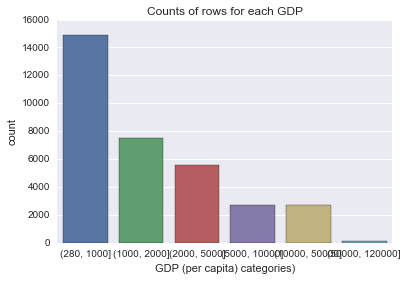

In [60]:
seaborn.countplot(x= 'GDPGroup', data= data)
plt.xlabel('GDP (per capita) categories)')
plt.title('Counts of rows for each GDP')
plt.show()

Univariate histogram for quantitative GDP varaible:

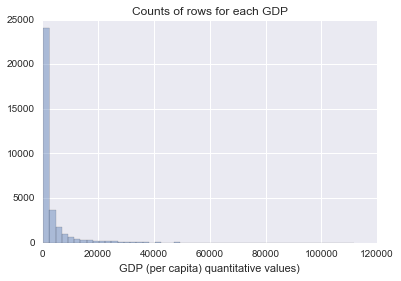

In [51]:
seaborn.distplot(data['GDP'].dropna(), kde= False)
plt.xlabel('GDP (per capita) quantitative values)')
plt.title('Counts of rows for each GDP')

# Create Under_five_mortality groups, describe and visualize:

In [74]:
print ('Under_five_mortality ranges from '+ str(data['Under_five_mortality'].min())+' and to '+ str(data['Under_five_mortality'].max()) )
data['Under_five_mortality'].describe()

Under_five_mortality ranges from 2.0 and to 756.29


count    33447.000000
mean       293.472086
std        166.042344
min          2.000000
25%        125.635000
50%        369.210000
75%        425.105000
max        756.290000
Name: Under_five_mortality, dtype: float64

In [75]:
data['MortalityGroup']= pd.cut(data.Under_five_mortality, [2,50,100,200,500,800]) 

In [76]:
data['MortalityGroup']= data['MortalityGroup'].astype('category')
data['MortalityGroup'].describe()

count          33446
unique             5
top       (200, 500]
freq           20951
Name: MortalityGroup, dtype: object

In [77]:
MG= data['MortalityGroup'].value_counts(sort= False, normalize= True)

In [79]:
MG

(2, 50]       0.146231
(50, 100]     0.073310
(100, 200]    0.102012
(200, 500]    0.626394
(500, 800]    0.052023
dtype: float64

/home/ayla/anaconda3/lib/python3.5/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


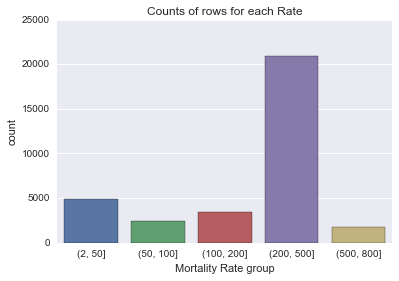

In [83]:
seaborn.countplot(x= 'MortalityGroup', data= data)
plt.xlabel('Mortality Rate group')
plt.title('Counts of rows for each Rate')
plt.show()

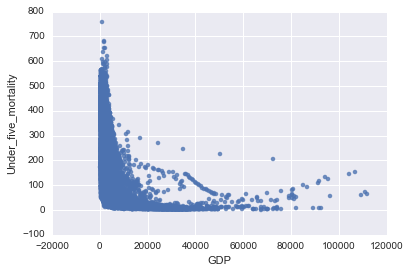

In [86]:
seaborn.regplot(x= "GDP", y= "Under_five_mortality", fit_reg= False, data= data)

Use data for only years after 2000

In [87]:
data2= data[data['Year']>=2000]

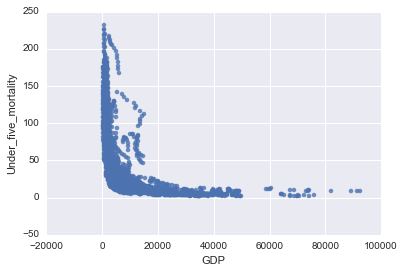

In [90]:
seaborn.regplot(x= "GDP", y= "Under_five_mortality", fit_reg= False, data= data2)

Create a factor plot, but first convert the "Under_five_mortality" varaible to a two-level categorical variable:

If the Under_five_mortality is above 50 (per 1000) then I will accept is as 1:

In [92]:
def MORTAL (row):
    if row['Under_five_mortality'] < 50 :
        return 0
    else:
        return 1

In [107]:
data2['Mortal']= data2.apply(lambda row : MORTAL(row), axis= 1)

/home/ayla/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


/home/ayla/anaconda3/lib/python3.5/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


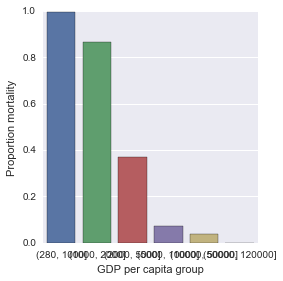

In [113]:
seaborn.factorplot(x= 'GDPGroup', y= 'Mortal', data= data2, kind= "bar", ci=None)
plt.xlabel('GDP per capita group')
plt.ylabel('Proportion mortality')
plt.show()

Rename the groups for better readability: 

In [108]:
def GDPRangeGroup (row):
   if row['GDP'] > 280.0 and row['GDP']<= 1000.0 :
      return 1
   if row['GDP'] > 1000.0 and row['GDP']<= 2000.0 :
      return 2
   if row['GDP'] > 2000.0 and row['GDP']<= 5000.0 :
      return 3
   if row['GDP'] > 5000.0 and row['GDP']<= 10000.0 :
      return 4
   if row['GDP'] > 10000.0 and row['GDP']<= 50000.0 :
      return 5
   if row['GDP'] > 50000.0 and row['GDP']<= 120000.0 :
      return 6

In [109]:
data2['GDPCat'] = data2.apply (lambda row: GDPRangeGroup (row),axis=1)

/home/ayla/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


/home/ayla/anaconda3/lib/python3.5/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


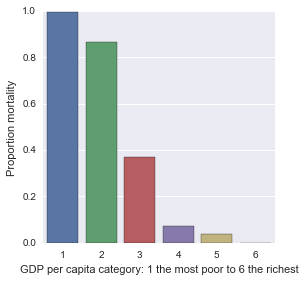

In [111]:
seaborn.factorplot(x= 'GDPCat', y= 'Mortal', data= data2, kind= "bar", ci=None)
plt.xlabel('GDP per capita category: 1 the most poor to 6 the richest')
plt.ylabel('Proportion mortality')
plt.show()